In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from os import listdir
sessions_df = pd.read_csv("data_toolkit/data/sessions.csv")
practices_df = pd.read_csv("data_toolkit/data/practices.csv")
ccgs_df = pd.read_csv("data_toolkit/data/ccgs.csv")

In [2]:
sessions_df.count()

id                      128618
practice_id             128618
posted_datetime         128618
start_datetime          128618
end_datetime            128618
hourly_rate             128618
original_hourly_rate     87316
status                  128618
locum_id                 47732
dtype: int64

In [3]:
print(sessions_df.status.unique())

['completed' 'withdrawn' 'expired' 'system_invalidated' 'posted' 'filled']


In [4]:
print("Completed: {}".format(sessions_df[sessions_df.status == 'completed'].count()[0]))
print("Filled: {}".format(sessions_df[sessions_df.status == 'filled'].count()[0]))
print("Expired: {}".format(sessions_df[sessions_df.status == 'expired'].count()[0]))

Completed: 40451
Filled: 3444
Expired: 27978


In [7]:
# Clean data
# We care about Completed / Filled / Expired sessions
clean_df = sessions_df[
    (sessions_df.status == 'completed') |
    (sessions_df.status == 'expired') |
    (sessions_df.status == 'filled')
]
clean_df['filled'] = clean_df[['status']].apply(
    lambda row: row['status'] in ['completed', 'expired'], axis=1
)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
display(clean_df.describe())

,id,practice_id,hourly_rate,original_hourly_rate,locum_id
count,7.187300e+04,7.187300e+04,71873.000000,56544.000000,4.391500e+04
mean,3.686400e+08,2.139361e+06,81.944086,82.027766,1.522447e+07
std,1.033498e+08,1.279175e+06,7.199402,6.891379,5.001106e+07
min,4.016688e+07,3.011200e+04,60.000000,1.850000,2.011000e+04
25%,4.011212e+08,3.019170e+05,80.000000,80.000000,2.012139e+06
50%,4.011550e+08,3.011153e+06,80.000000,80.000000,2.013710e+06
75%,4.011850e+08,3.011767e+06,85.000000,85.000000,2.015509e+06
max,4.012203e+08,3.012808e+06,150.000000,150.000000,2.017111e+08


In [42]:
rate_range = range(70, 130)
unfilled_df = clean_df[clean_df['status'] == 'expired']
unfilled = {}
for i in rate_range:
    unfilled[i] = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
filled_df = clean_df[clean_df['status'] != 'expired']
filled = {}
for i in rate_range:
    filled[i] = filled_df[filled_df['hourly_rate'] == i].count()[0]

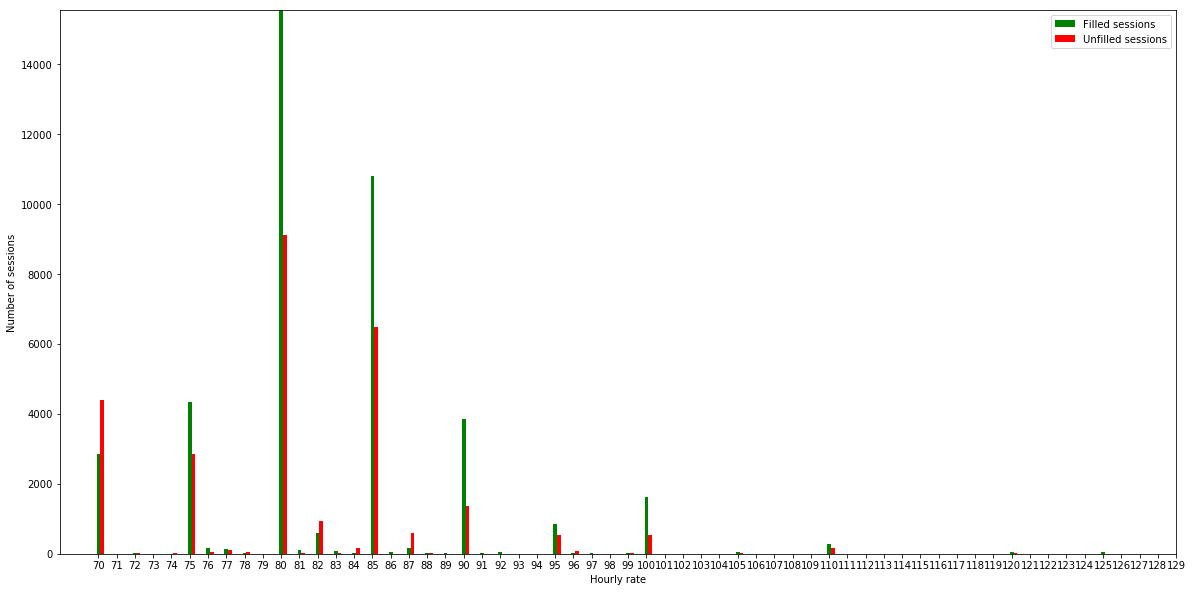

In [55]:
import matplotlib.pyplot as plt

xs = list(rate_range)

ax = plt.subplot(111)
filled_bar = ax.bar([x - 2 for x in xs], filled.values(), width=0.2, color='g', align='center')
unfilled_bar = ax.bar([x + 0.2 - 2 for x in xs], unfilled.values(), width=0.2, color='r', align='center')
ax.autoscale(tight=True)
fig = ax.figure
fig.set_size_inches((20, 10), forward=True)
ax.set_ylabel("Number of sessions")
ax.set_xlabel("Hourly rate")
ax.legend((filled_bar, unfilled_bar), ("Filled sessions", "Unfilled sessions"))
ax.set_xticks(xs)
plt.show()

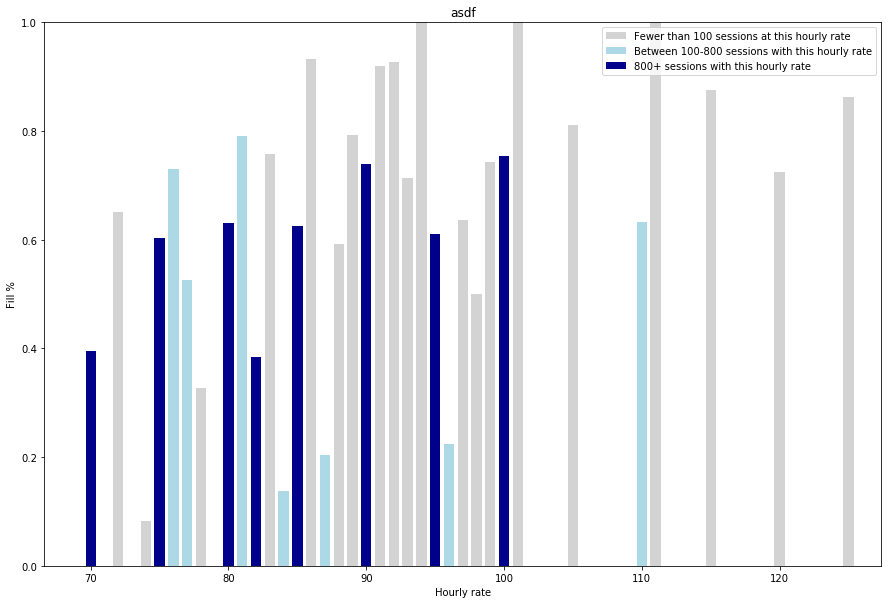

In [71]:
rate_range = range(69, 130)
percentage = {}
for i in rate_range:
    unfilled_count = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
    filled_count = filled_df[filled_df['hourly_rate'] == i].count()[0]
    if unfilled_count or filled_count:
        percentage[i] = filled_count / (unfilled_count + filled_count)
    else:
        percentage[i] = 0
        
percentage_with_significance = {}
for i in rate_range:
    unfilled_count = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
    filled_count = filled_df[filled_df['hourly_rate'] == i].count()[0]
    if unfilled_count + filled_count > 100:
        percentage_with_significance[i] = filled_count / (unfilled_count + filled_count)
    else:
        percentage_with_significance[i] = 0
        
percentage_with_great_significance = {}
for i in rate_range:
    unfilled_count = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
    filled_count = filled_df[filled_df['hourly_rate'] == i].count()[0]
    if unfilled_count + filled_count > 800:
        percentage_with_great_significance[i] = filled_count / (unfilled_count + filled_count)
    else:
        percentage_with_great_significance[i] = 0

xs = list(rate_range)

ax = plt.subplot(111)
percentage_bar = ax.bar([x - 2 for x in xs], percentage.values(), width=0.75, color='lightgrey', align='center')
percentage_with_significance_bar = ax.bar([x - 2 for x in xs], percentage_with_significance.values(), width=0.75, color='lightblue', align='center')
percentage_with_great_significance_bar = ax.bar([x - 2 for x in xs], percentage_with_great_significance.values(), width=0.75, color='darkblue', align='center')
ax.autoscale(tight=True)
fig = ax.figure
fig.set_size_inches((15, 10), forward=True)
ax.set_ylabel("Fill %")
ax.set_xlabel("Hourly rate")

ax.legend((percentage_bar, percentage_with_significance_bar, percentage_with_great_significance_bar), 
          ("Fewer than 100 sessions at this hourly rate", "Between 100-800 sessions with this hourly rate", "800+ sessions with this hourly rate"))

plt.show()

In [57]:
print(filled[95])

846
